In [1]:
from ubiquitous_computing_machine.Problem1.part_1a import *
from ubiquitous_computing_machine.Problem1.part_1b import *
from ubiquitous_computing_machine.Problem1.part_1c import *
from ubiquitous_computing_machine.plot import *
from ubiquitous_computing_machine.utils import *
import os

# print the working directory
print(os.getcwd())

c:\Users\javid.rezai\CSMaster\Statistik\ubiquitous-computing-machine\ubiquitous_computing_machine


### Prolem 1:
**Preprocessing**
The inital load of the data had some nan values, which were replaced by the median of the column.
#### Part a


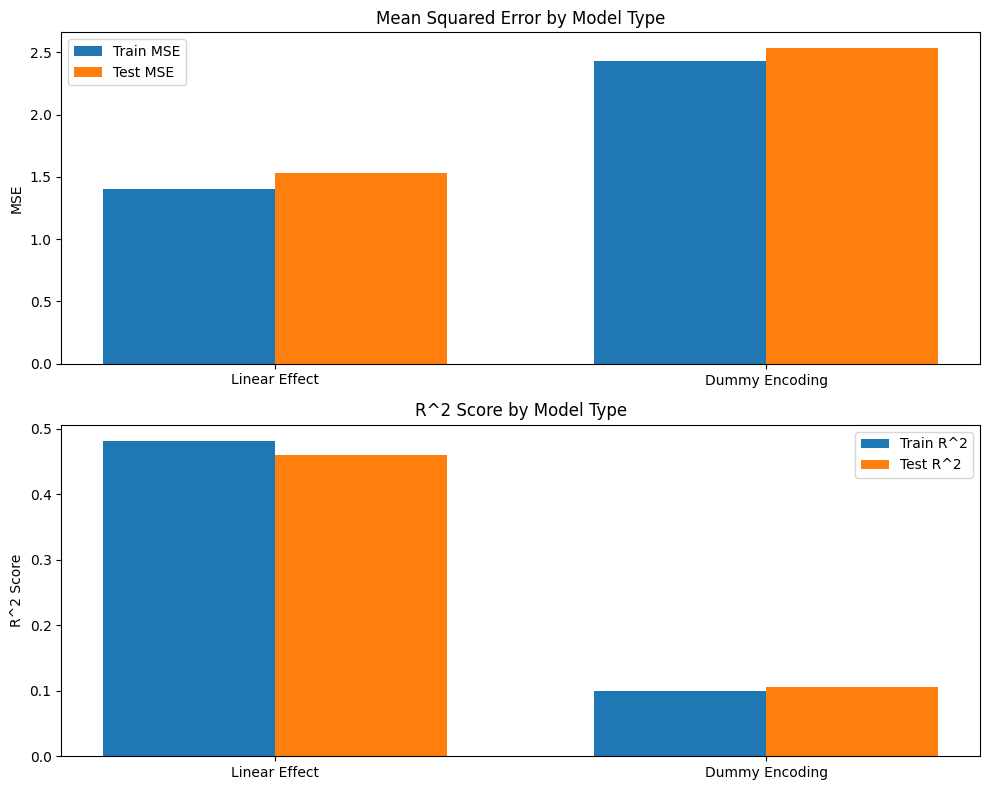

Test Error for Linear fit: 1.530
Test Error for Dummy Encoding fit: 2.533


In [2]:
X,y = get_data()

# Part ai
eval_metrics_i, beta = linear_effect(X, y,r_state=42)
train_error_i, test_error_i, r2_train_i, r2_test_i = eval_metrics_i["train_error"], eval_metrics_i["test_error"], eval_metrics_i["r2_train"], eval_metrics_i["r2_test"]

# Part aii
eval_metrics_ii, beta_i = dummy_encoding_effect(X, y, r_state=42)

train_error_ii, test_error_ii, r2_train_ii, r2_test_ii = eval_metrics_ii["train_error"], eval_metrics_ii["test_error"], eval_metrics_ii["r2_train"], eval_metrics_ii["r2_test"]

plot_model_comparison(train_error_i, test_error_i, r2_train_i, r2_test_i, train_error_ii, test_error_ii, r2_train_ii, r2_test_ii)

print(f"Test Error for Linear fit: {test_error_i:.3f}")
print(f"Test Error for Dummy Encoding fit: {test_error_ii:.3f}")

The Test error(MSE) for linear fit on regular data is significantly smaller then on dummy encoded data. This is to be expected as the regular data contains more information about the predictors. 



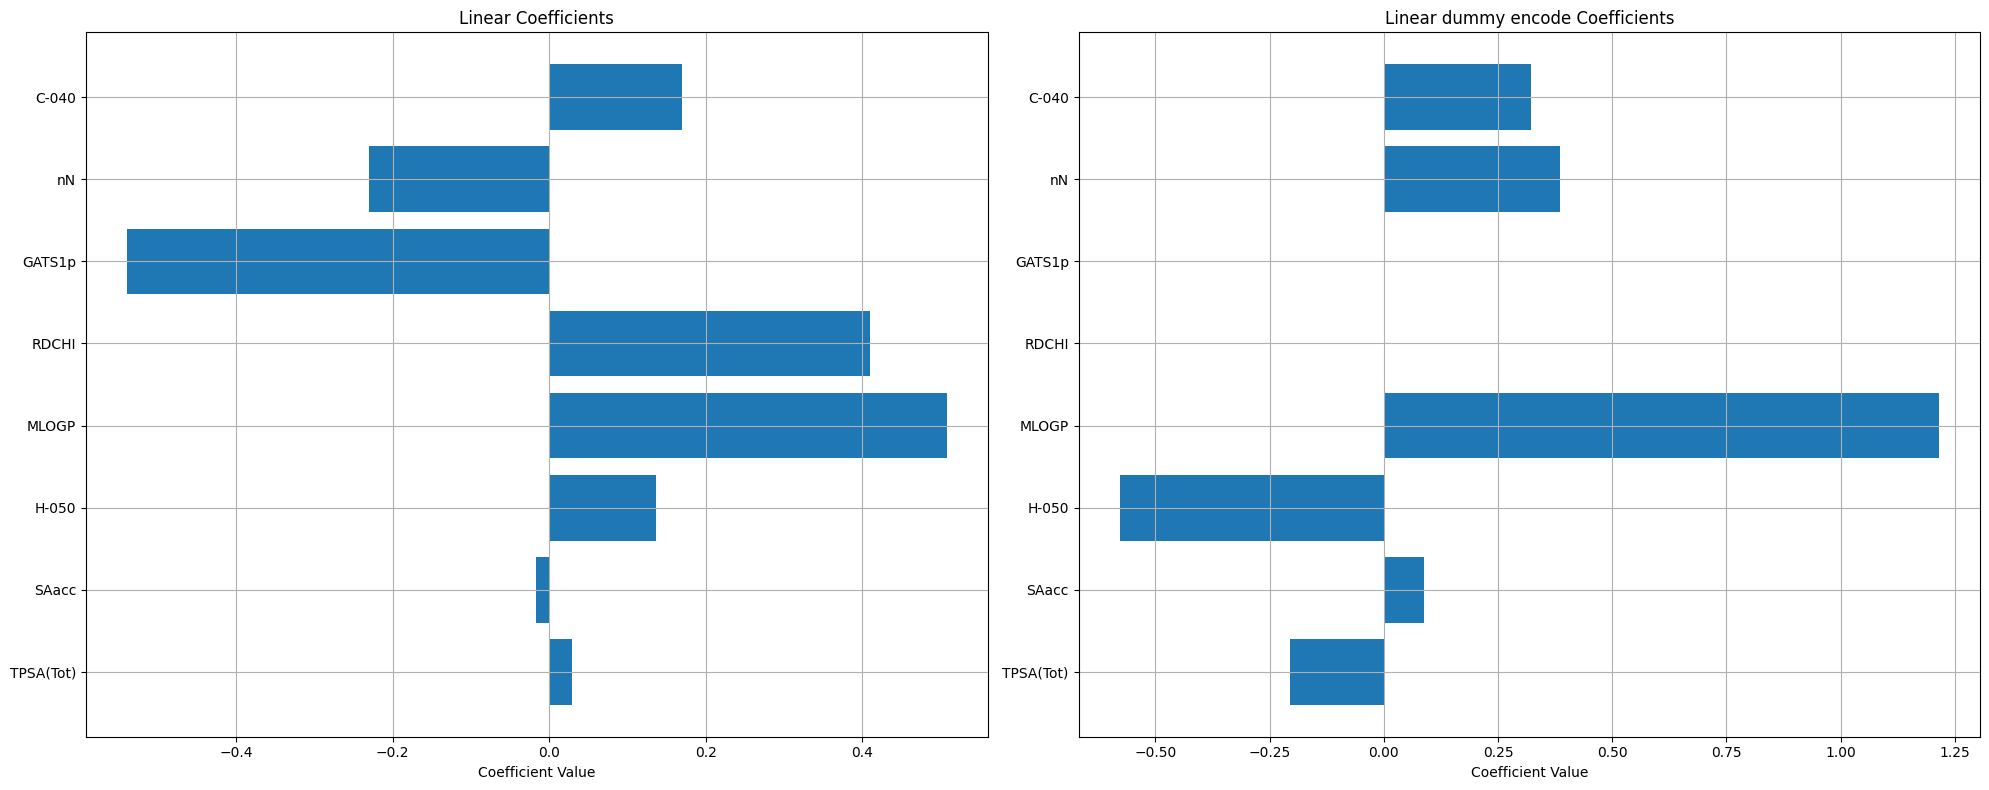

In [3]:
plot_both_coefficients(beta, beta_i)

Looking at the coefficients for the model on regular data we see that predictors such as `RDCHI` and `MLOGP`, have larger positive coefficients, indicating that they have a stronger positive relationship with LC50.
`GATS1p` and `nN` have negative coefficients, meaning they are negatively associated with the response variable. 
When dummy encoding the data, some the predictors `RDCHI` and `GATS1p` completely loses their significance, becasue there is no variation in the data. From the figure bellow we see that they are constant for all the observations.

We also can see that some coefficients have larger magnitude in the dummy encoded data, this might be because som scaling that is being done, the particular predictors are for example the `MLOGP`, `TPSA` and `H-050`.


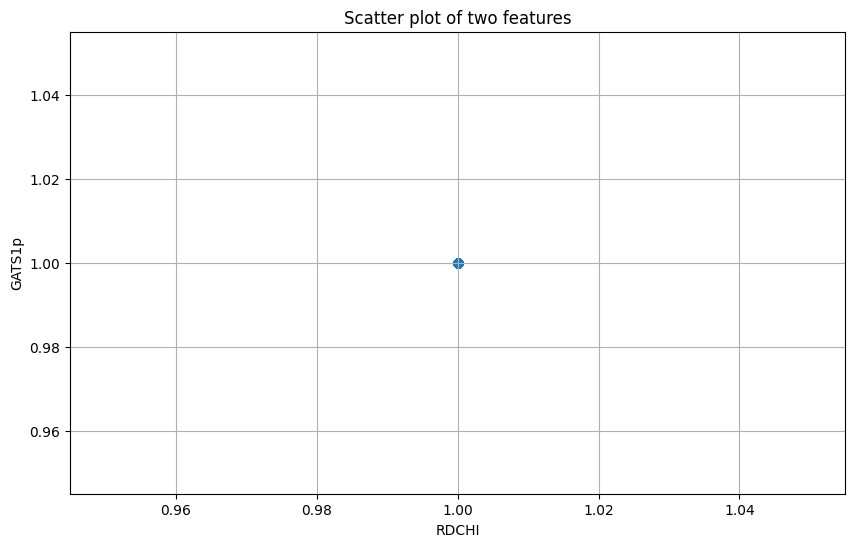

In [4]:
X_bin= dummy_encode(X)
plot_two_features(X_bin, 4,5)

#### Part b

In [5]:
eval_metrics = repeat_experiment(X, y, 200)

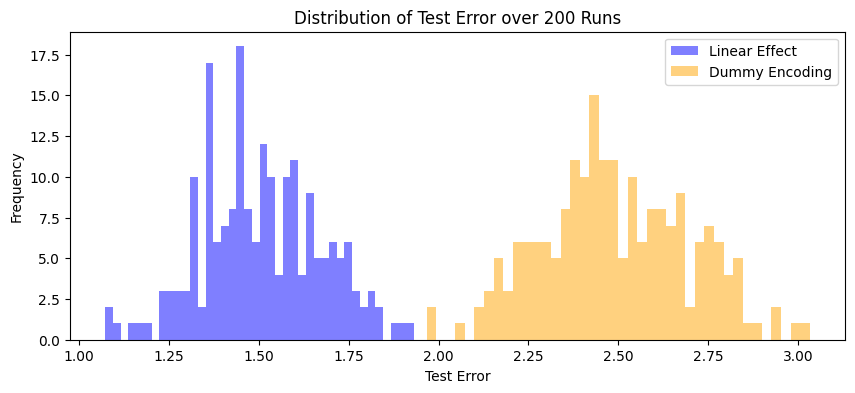

Average Test Error - Linear Effect: 1.5076
Average Test Error - Dummy Encoding: 2.4910


In [6]:
train_errors_i = eval_metrics["train_errors_i"]
train_errors_ii = eval_metrics["train_errors_ii"]
train_scores_i = eval_metrics["train_scores_i"]
train_scores_ii = eval_metrics["train_scores_ii"]
test_errors_i = eval_metrics["test_errors_i"]
test_errors_ii = eval_metrics["test_errors_ii"]
test_scores_i = eval_metrics["test_scores_i"]
test_scores_ii = eval_metrics["test_scores_ii"]

plot_distributions(test_errors_i, test_errors_ii, "Test Error")

By repeating the experiment 200 times with different training and test splits, we can assess the stability and reliability of each modeling approach. The Regular data model shows a lower average test error and less variability compared to the Dummy Encoding model. This suggests that the regular data model is more robust and consistently provides better predictions. It can be seen that the two distributions are almost mutually exclusive interms highest error of for the regular data model is always lower than the lowest error for the dummy encoded model. 

Repeating the experiment helps avoid over-relying on results from a single train-test split, which could be unrepresentative. By examining the distribution of test errors, we can get a clearer picture of each model’s performance over various splits.

The Dummy Encoding approach generally performs worse because binarizing the count variables reduces the information they convey. When converted to binary indicators, these variables lose their continuous nature, which likely contributes valuable predictive information in the context of our target variable. As a result, the Linear regular data model, which retains the continuous form of the variables, achieves lower test errors.

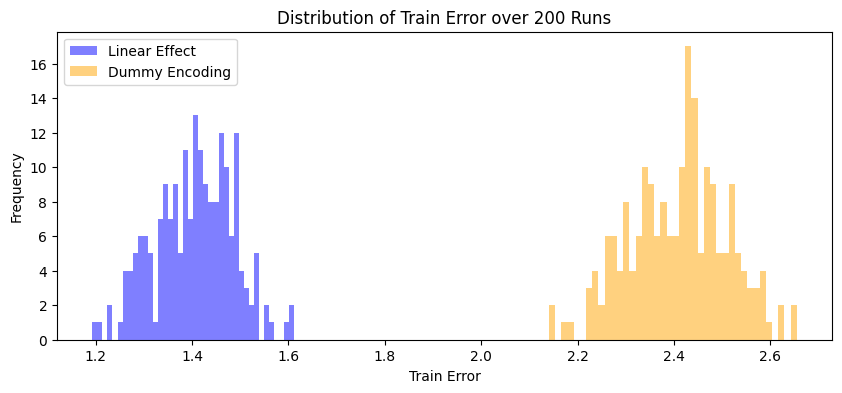

Average Train Error - Linear Effect: 1.4046
Average Train Error - Dummy Encoding: 2.4084


In [7]:
plot_distributions(train_errors_i, train_errors_ii, "Train Error")

The trian error looks to retain the exclusivity even more then the test error, there dont seem to be any overlap between the two distributions and are far apart. This is an effect for lower variability in errors for both models.
And not larger average difference in errors between the two models.
The significance difference in the test error and train error looks to be the fact that the variability for test error is higher than for train error. For comparison the average:


| Metric                        | Regular data  | Dummy Encoded data|
|-------------------------------|---------------|-------------------|
| Average Train Error           | 1.4122        | 2.3938            |
| Average Test Error            | 1.4904        | 2.5158            |


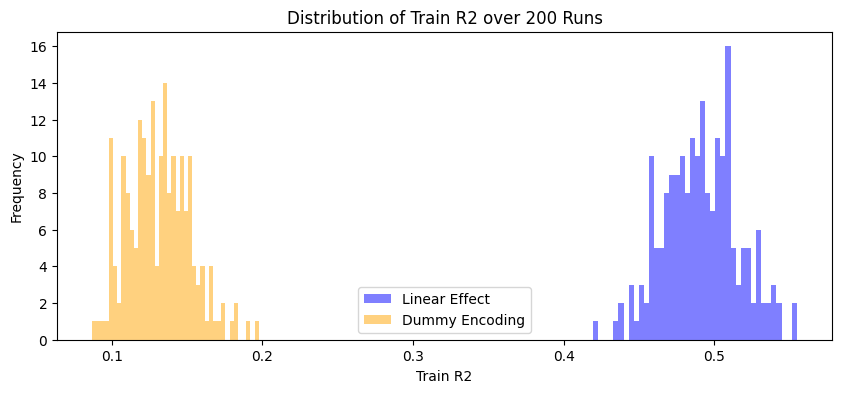

Average Train R2 - Linear Effect: 0.4912
Average Train R2 - Dummy Encoding: 0.1315


In [8]:
plot_distributions(train_scores_i, train_scores_ii, "Train R2")

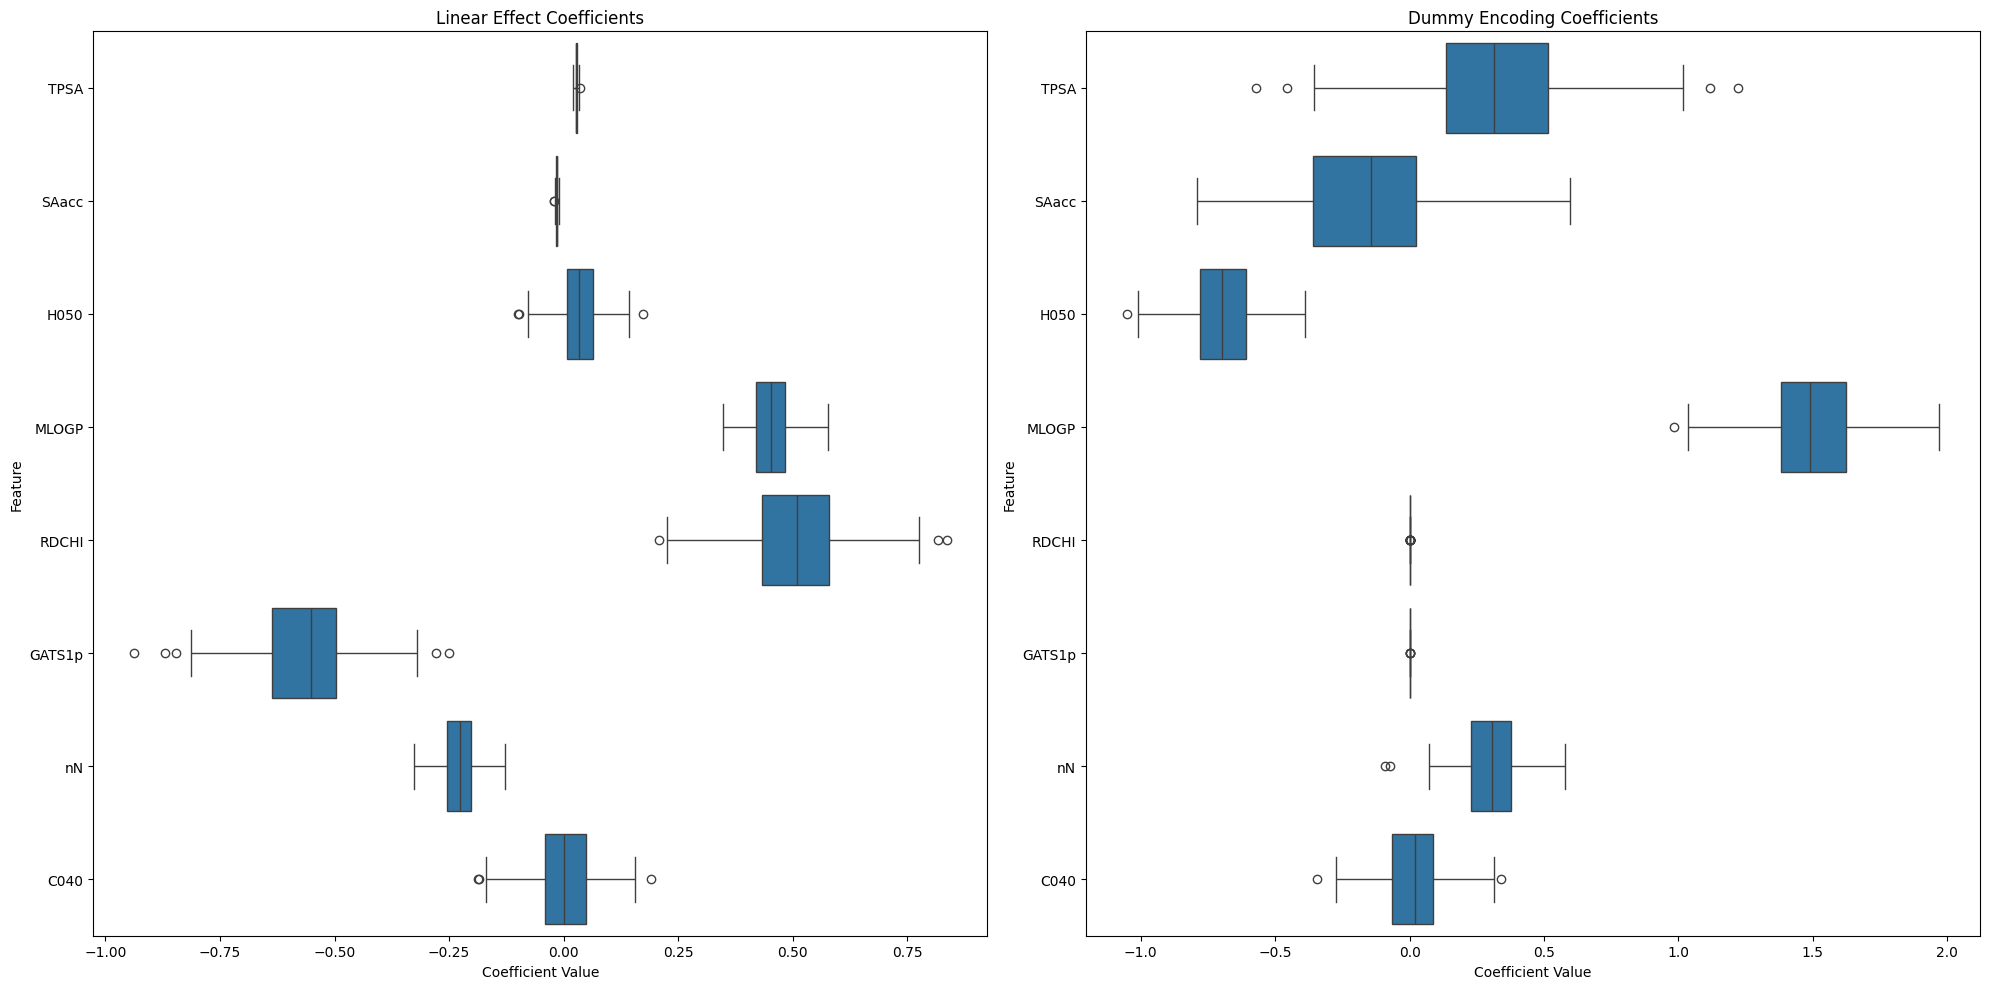

In [9]:
visualize_coefficients(eval_metrics)

The above plot is a box plot of coeffcients for the two models, included with intequartile range (IQR) being the central which contains the middle 50% of the coefficient values. The "whiskers" extend from the box to show range of values within 1.5 times the IQR from both edges.Threy are used to show the distribution  and variability of the coefficients/feature across multiple train testsplits.

**Regular data Model (Left Plot):**

The coefficients for each feature are relatively stable, with low variability across the 200 iterations.
Certain features, like RDCHI and MLOGP, have relatively higher positive coefficients, indicating that they have a stronger positive effect on `LC50`.
Other features, like `GATS1p` and `nN`, have negative coefficients, suggesting they are inversely related to `LC50`.
The narrow spread in most of these coefficients suggests that the linear model consistently estimates similar effects for each variable, implying robustness and stability across different train-test splits

**Dummy encoding Model (Right Plot):**

The coefficients for some features (e.g., TPSA and SAacc) have a much broader range, indicating higher variability in their estimated effect across iterations. This instability might arise from the binary nature of the dummy variables, which reduces the amount of information captured compared to continuous values.
The high coefficients for H050 and MLOGP indicate that these features have a strong effect when they are present, but their interpretation is less straightforward than in the continuous Linear Effect model.
The spread in coefficients, particularly for variables with a wide range, suggests that the Dummy Encoding model may be less stable and more sensitive to variations in the training data.

### Part c


**Variable selected:**

- backward elemintation
Start by full model and then consider to remove each predictor one at a time, so for each predictor $X_i$ in the model we fit a model without $X_i$ and compute the selection critierion (AIC, BIC), based on the score, if the socre is low enough we remove the predictor from the model and continue the process until we reach the stopping criteria.


- forward selection
Start with an empty model and then consider to add each predictor one at a time, so for each predictor $X_i$ not in the model we fit a model with $X_i$ and compute the selection critierion (AIC, BIC), based on the score, if the the best score is lower then previouse score we add the predictor to the model and continue the process until we reach the stopping criteria.

**Stopping criteria:**

The general term for Akaikes information criterion (AIC) and Bayesian information criterion (BIC) are given by:

$$AIC = 2k - 2ln(\hat{L})$$
$$BIC = kln(n) - 2ln(\hat{L})$$

where $k$ is the number of predictors in the model, $n$ is the number of observations and $\hat{L}$ is the maximized value of the likelihood function of the model. The AIC and BIC are both penalized log-likelihood criteria, where the penalty is larger for BIC than for AIC. The AIC and BIC are used to compare models, where the model with the lowest AIC or BIC is considered the best.


In Linear regression models with normally distributed errors, as we have that our model is, the AIC can be simplified to the following:

$$AIC = nln(\frac{RSS}{n}) + 2k$$

where $RSS$ is the residual sum of squares of the model, $n$ is the number of observations and $k$ is the number of predictors in the model.

The BIC can be simplified to the following:

$$BIC = nln(\frac{RSS}{n}) + kln(n)$$

The AIC and BIC are both penalized log-likelihood criteria, where the penalty is larger for BIC than for AIC.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1 / 3, random_state=42
)
feature_mapping = {
    0: "TPSA(Tot)",
    1: "SAacc",
    2: "H-050",  # descrete values
    3: "MLOGP",
    4: "RDCHI",
    5: "GATS1p",
    6: "nN",  # descrete values
    7: "C-040",  # descrete values
}

fs_aic, mse_fs_aic = forward_selection(X_train, y_train, criterion="AIC")
fs_bic, mse_fs_bic = forward_selection(X_train, y_train, criterion="BIC")
be_aic, mse__be_aic = backward_elimination(X_train, y_train, criterion="AIC")
be_bic, mse_be_bic = backward_elimination(X_train, y_train, criterion="BIC")


def map_features(features, feature_mapping):
    return [feature_mapping[feature] for feature in features]


print("Forward Selection |AIC:", map_features(fs_aic, feature_mapping), f"| MSE: {mse_fs_aic:.3f}")
print("Forward Selection |BIC:", map_features(fs_bic, feature_mapping), f"| MSE: {mse_fs_bic:.3f}")
print("Backward Elimination |AIC:", map_features(be_aic, feature_mapping), f"| MSE: {mse__be_aic:.3f}")
print("Backward Elimination |BIC:", map_features(be_bic, feature_mapping), f"| MSE: {mse_be_bic:.3f}")


Forward Selection |AIC: ['MLOGP', 'TPSA(Tot)', 'SAacc', 'nN', 'GATS1p', 'RDCHI'] | MSE: 1.421
Forward Selection |BIC: ['MLOGP', 'TPSA(Tot)', 'SAacc', 'nN', 'GATS1p', 'RDCHI'] | MSE: 1.421
Backward Elimination |AIC: ['TPSA(Tot)', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040'] | MSE: 1.400
Backward Elimination |BIC: ['TPSA(Tot)', 'SAacc', 'MLOGP', 'RDCHI', 'GATS1p', 'nN'] | MSE: 1.421


**Discussion:**

Both AIC and BIC selected the same set of features:

`MLOGP`, `TPSA(Tot)`, `SAacc`, `nN`, `GATS1p`, `RDCHI` in forward selection , This implies that these features gives largest expleantory power to the model. and adding more features would not give significance improvement to the model. THe order in forward selection is important as the first feature added is the one that gives the largest improvement to the model, in our case being `MLOGP`.

On the other hand backward selection with AIC choose all the features, reason for this is becasue AIC has ligher penalty for adding more features, comparing the MSE for full model and the features selected with in forward selection we see that the MSE is slightly lower, however not significant. And since BIC has a larger penalty for adding more features it selects the same features as forward selection, removing `H-050` and `C-040` from the model.

removing two features given large sample size can be beneficial as it reduces the complexity and computation time of the model. if adding more features would not give significant improvement to the model.

In this case either either forward selection with AIC or BIC and backward selection with BIC would be the best choice for selecting the features for the model. since the improvement from my point of view is not significant and data requirements become 25 % less which is alot. 

### Part d


In this part we are doing a grid search for optimal parameter for ridge regression model estimation using k-fold cross validation and bootstrapping.

Cross validation is a technique used to assess the performance of a model by splitting the data into training and test sets multiple times. The data is divided into k-folds, where the model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold serving as the test set once. The average test error across all folds is used as an estimate of the model’s performance.

Bootstrapping is a resampling technique that involves drawing samples with replacement from the original data set. This process generates multiple bootstrap samples, which are used to estimate the variability of a model.

Ridge regression adds a penalty term to the ordinary least squares (OLS) loss function, which helps prevent overfitting by shrinking the coefficients towards zero. The penalty term is controlled by the regularization parameter λ, which determines the trade-off between model complexity and fit to the data. Ridge regression is particularly useful when the data is multicollinear, as it can stabilize the coefficients and improve the model’s generalization performance.

In [11]:
from ubiquitous_computing_machine.Problem1.part_1d import *

lambda_values = np.logspace(-2, 3, 50)
k_folds = 100

best_lambda_cv, cv_mse, cv_results = ridge_with_cv(X,y,lambda_values,cv_folds=k_folds)
bootstrapped_mse = ridge_with_bootstrap(X,y,lambda_values, n_bootstrap=20)

print(f"Best alpha (CV): {best_lambda_cv:.3f}")
print(f"CV MSE: {cv_mse:.3f}")

best_alpha_bootstrap = min(bootstrapped_mse, key=bootstrapped_mse.get)
print(f"Best alpha (Bootstrap): {best_alpha_bootstrap:.3f}")
print(f"Bootstrap MSE: {bootstrapped_mse[best_alpha_bootstrap]:.3f}")
    

Best alpha (CV): 11.514
CV MSE: 1.500
Best alpha (Bootstrap): 9.103
Bootstrap MSE: 1.455


From the grid search we have obtained the optimal value of $λ$ and lowest MSE for both cross-validation and bootstrapping. 

| Method          | Best alpha | MSE   |
|-----------------|------------|-------|
| Cross-Validation| 11.514     | 1.500 |
| Bootstrap       | 7.197      | 1.451 |

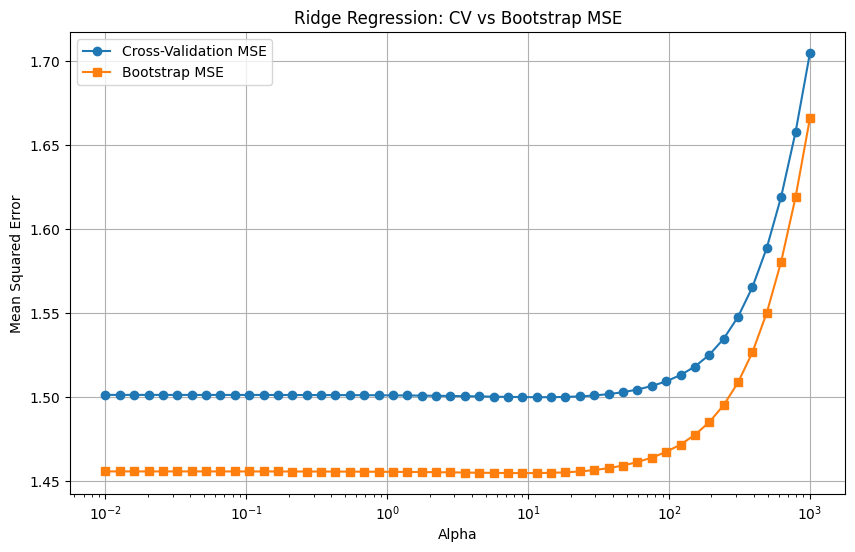

In [12]:
plot_results(lambda_values, -cv_results["mean_test_score"], bootstrapped_mse)

Both methods follow ushaped curve where the MSE decreases with lower values of $λ$ and largly increases for  $λ>100$ for both. However the bootstrap method maintains a lower MSE compared to cross-validation for all values of $λ$ In the defined range. This suggests that bootssraping is more robust. Bootstrap tends to capture a broader distribution of original data, since it samples with replacement, this can lead to error estimates being closer to expected values. Cross-validation, on the other hand, can be more sensitive to the specific data splits, which may lead to higher variability in the error estimates.

To compare regular linear regression and ridge regression with bootstrapp and cross-validation we can see that for the MSE that Ridge regression with bootstrapping and cross-validation do have slightly lower MSE compared to regular linear regression. 

| Method          | MSE   |
|-----------------|-------|
| Linear Regression| 1.430 |
| Ridge Regression (CV) | 1.500 |
| Ridge Regression (Bootstrap) | 1.451 |

Thus Ridge regression CV and bootstrap yields better performance compared to regular linear regression. while Ridge regression with bootstrapping give the best performance.


### Part e

Fit GAM model to the data and compare the performance to the linear regression model.

In [13]:
from ubiquitous_computing_machine.Problem1.part_1e import *
from ubiquitous_computing_machine.utils import feature_names, get_data
from tabulate import tabulate

In [14]:
X,y = get_data()

gam_results_1 = fit_gam(X, y, df_spline=[2, 5, 8], spline_type=1)
gam_results_2 = fit_gam(X, y, df_spline=[3, 5, 8], spline_type=2)
gam_results_3 = fit_gam(X, y, df_spline=[4, 5, 8], spline_type=3)

results = []

for df, result in gam_results_1.items():
    results.append([df, 1, result['train_mse'], result['test_mse']])

for df, result in gam_results_2.items():
    results.append([df, 2, result['train_mse'], result['test_mse']])

for df, result in gam_results_3.items():
    results.append([df, 3, result['train_mse'], result['test_mse']])


results.sort(key=lambda x: x[3])




In part e of problem 1 we fitter a GAM to allow for non-linear relationships between the predictors and the response variable. The GAM model uses a spline basis to model the relationship between each predictor and the response, allowing for more flexible and complex relationships than the linear model. It has been experimented with different degrees of freedom (df) and spline types (spline_type) going from linear to cubic splines. The results are summarized in the table bellow.

**Model Complexity vs. Performance:**

As the model complexity increases (higher df and spline_type), the training MSE decreases, indicating a better fit to the training data.
However, the test MSE increases with higher complexity, suggesting that the model is overfitting the training data and not generalizing well to new data

**Optimal Model:**
The model with df=2 and `spline_type` being linear has the lowest test MSE, implying that a simpler model provides the best predictive performance on unseen data.

**Comparison to Linear Model:**
We found that Using GAM with df=2 and linear spline_type gave the lowest test MSE of `1.523`, and also actually being higher than the linear model. So for this particular dataset a simple linear model would be best. Although we have found that bootstrapping Ridge regression gave the best performance with MSE of `1.451`.

In [15]:
print(tabulate(results, headers=["df", "Spline Order", "Training MSE", "Test MSE"], tablefmt="grid"))


+------+----------------+----------------+------------+
|   df |   Spline Order |   Training MSE |   Test MSE |
+======+================+================+============+
|    2 |              1 |        1.40291 |    1.52259 |
+------+----------------+----------------+------------+
|    4 |              3 |        1.39501 |    1.52436 |
+------+----------------+----------------+------------+
|    3 |              2 |        1.39048 |    1.52486 |
+------+----------------+----------------+------------+
|    5 |              3 |        1.35897 |    1.52833 |
+------+----------------+----------------+------------+
|    5 |              1 |        1.31898 |    1.56539 |
+------+----------------+----------------+------------+
|    5 |              2 |        1.31701 |    1.57963 |
+------+----------------+----------------+------------+
|    8 |              3 |        1.26446 |    1.61124 |
+------+----------------+----------------+------------+
|    8 |              1 |        1.16484 |    1.

Nonlinear Effects:
The partial dependence plots show that predictors have close linear relationships with the response. And also follow the same pattern for covariance with simple linear model in [Part a](#part-a). With pattern: 

positive, negative,potitive,potitive,potitive,negative,negative,potitive. In the same order as feature order in the data.

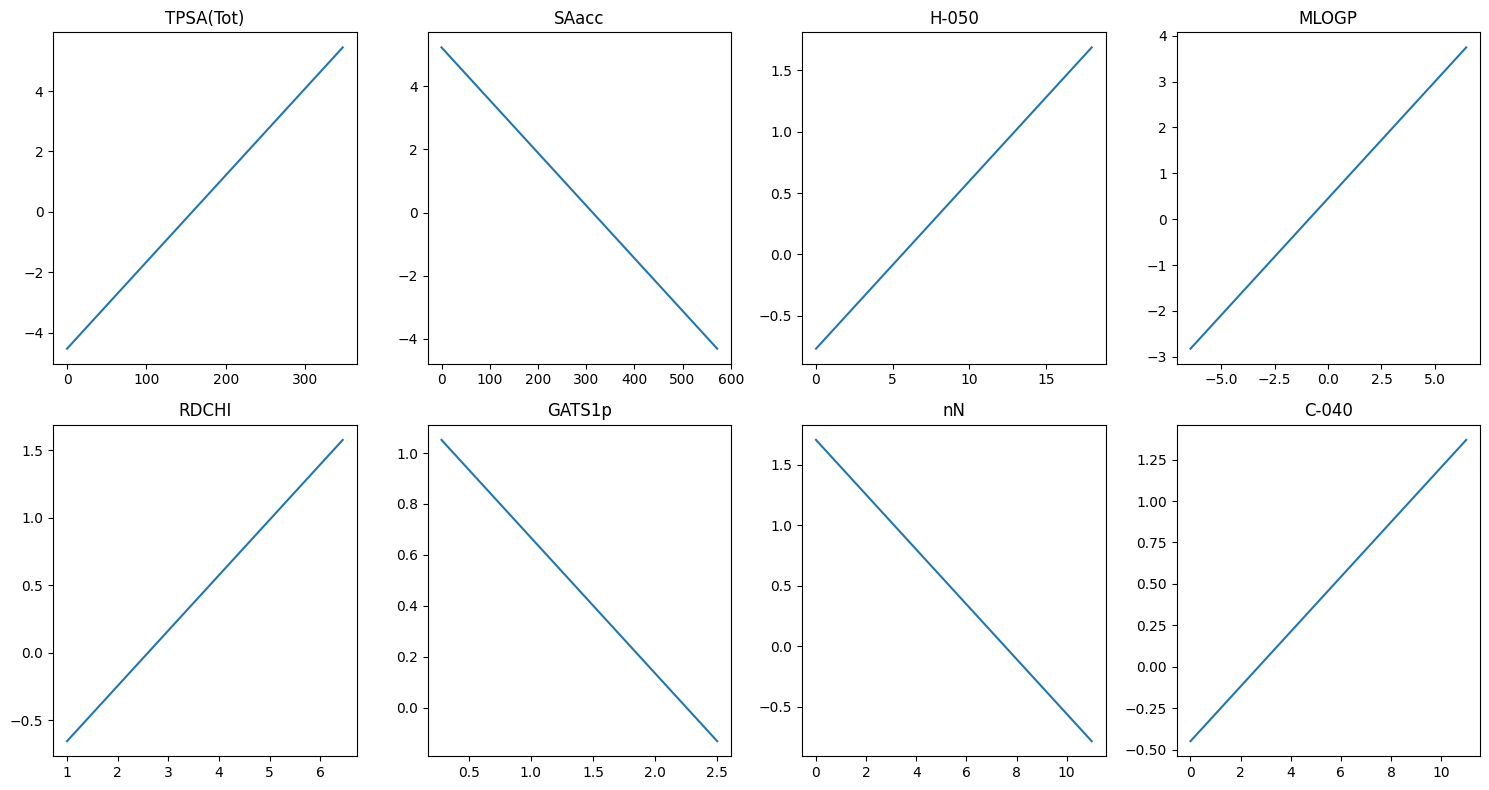

In [16]:
plot_gam_effects(gam_results_1[2]["model"], feature_names)
plt.show()

#### Part f

Regression tree fitting model


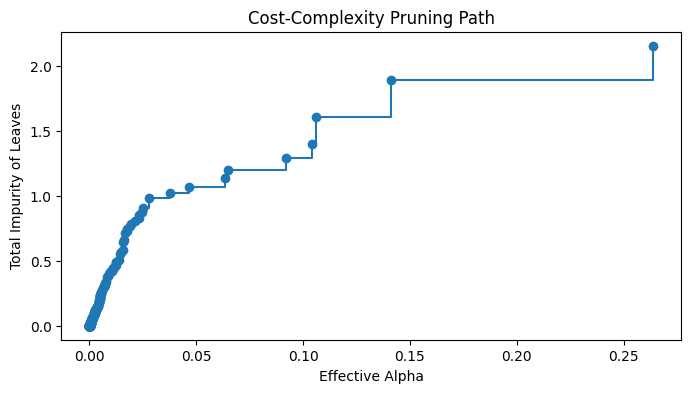

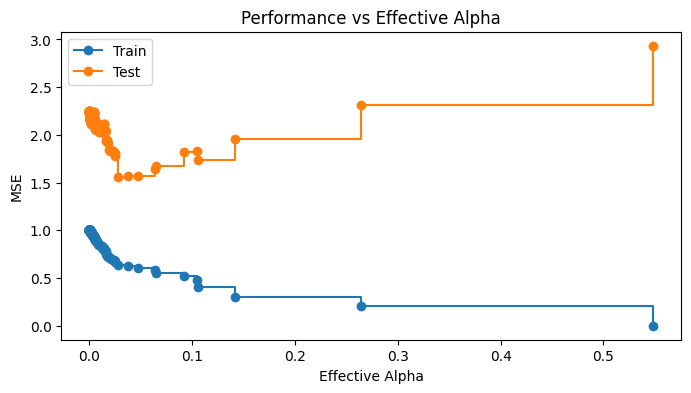

Minimum Train Error: 0.001
Minimum Test Error: 1.557


In [17]:
from ubiquitous_computing_machine.Problem1.part_1f import *
reg_tree = fit_decision_tree(X_train, y_train)
ccp_alphas, impurities = get_pruning_path(reg_tree, X_train, y_train)
plot_pruning_path(ccp_alphas, impurities)

trees = train_trees(X_train, y_train, ccp_alphas)
eval_metrics = evaluate_trees(trees, X_train, y_train, X_test, y_test, ccp_alphas)
train_scores, test_scores = eval_metrics["train_scores"], eval_metrics["test_scores"]

min_mse_train = min(eval_metrics["mse_train"])
min_mse_test = min(eval_metrics["mse_test"])

print(f"Minimum Train Error: {min_mse_train:.3f}")
print(f"Minimum Test Error: {min_mse_test:.3f}")


**Cost-Complexity Pruning Path**

The first plot, "Cost-Complexity Pruning Path," shows the relationship between the alpha parameter (complexity parameter) and the total impurity of leaves (sum of squared errors).

As alpha increases, the total impurity increases because the tree is pruned more aggressively, reducing the number of nodes and, consequently, the model's complexity.
Initially, when alpha is low (close to zero), the impurity is low because the tree is very complex and fits the training data well.
As alpha increases, more branches of the tree are pruned, and impurity rises due to the reduction in the model’s ability to fit the data closely.

**Performance Comparison**

Training MSE (blue line): As alpha increases (more pruning), the training MSE generally decreases. This is expected because the tree becomes less complex and cannot capture all patterns in the training data.
Test MSE (orange line): Initially, as alpha increases slightly, the test MSE score improves that is decreases until the optimal alpha, indicating that pruning helps the model generalize better by reducing overfitting. However, as alpha continues to increase, the test MSE eventually drops, suggesting that the model becomes too simple (underfitting) and cannot capture the underlying data structure effectively. optimal alpha is found to be `0.028`.

**Metrics for the optimal tree:**

| Metric               | Value  |
|----------------------|--------|
| Optimal alpha        | 0.028  |
| Minimum Train Error  | 0.001  |
| Minimum Test Error   | 1.557  |


**Optimal Tree:**

Optimal alpha: 0.027811156158742203
Optimal tree depth: 6
Optimal number of leaves: 13


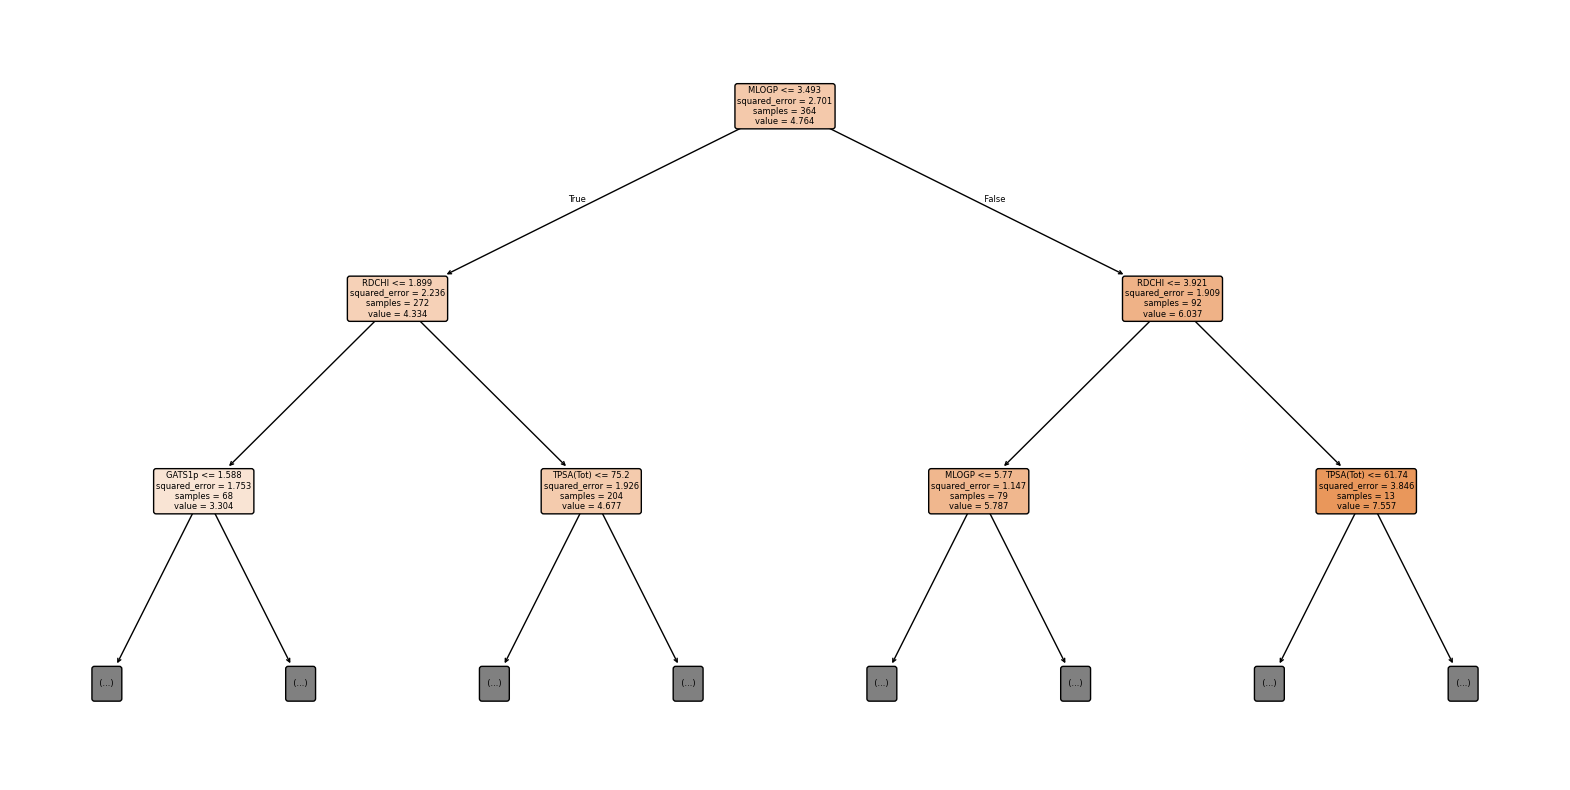

Optimal alpha: 0.028


In [18]:
optimal_tree = select_optimal_tree(ccp_alphas, test_scores, trees)

print(f"Optimal alpha: {optimal_tree.ccp_alpha:.3f}")


The final tree after pruning has a depth of 6 and has 13 optimal of leaf nodes with optimal alpha of `0.028`.
The first node splits on `MLOGP` with a threshold of `3.493`, indicating that this feature is the most important predictor in the tree. 

### Part g


In this section, we compare the performance of all the models implemented in the previous parts in terms of both training and test error. The models include:

Linear Regression (Part a)
Dummy Encoding Linear Regression (Part a)
Forward and Backward Selection (Part c)
Ridge Regression with Cross-Validation and Bootstrapping (Part d)
Generalized Additive Model (GAM) (Part e)
Regression Tree (Part f)
Training and Test Errors
| Model                              | Training Error | Test Error |
|------------------------------------|----------------|------------|
| Ridge Regression (Bootstrapping)   | -              | 1.451      |
| Linear Regression                  | 1.4122         | 1.4904     |
| Forward Selection (AIC)            | 1.4122         | 1.4904     |
| Forward Selection (BIC)            | 1.4122         | 1.4904     |
| Backward Elimination (AIC)         | 1.4122         | 1.4904     |
| Backward Elimination (BIC)         | 1.4122         | 1.4904     |
| Ridge Regression (Cross-Validation)| -              | 1.500      |
| GAM (df=2, spline_order=1)         | -              | 1.523      |
| Regression Tree                    | 0.001          | 1.557      |
| Dummy Encoding Linear Regression   | 2.3938         | 2.5158     |

**Discussion**

Linear Regression vs. Dummy Encoding Linear Regression:

The Linear Regression model significantly outperforms the Dummy Encoding Linear Regression model in both training and test errors. This is expected as the dummy encoding reduces the information content of the predictors.
Forward and Backward Selection:

Both forward and backward selection methods with AIC and BIC criteria selected the same set of features and resulted in the same training and test errors as the full Linear Regression model. This indicates that the selected features provide the best explanatory power without overfitting.
Ridge Regression:

Ridge Regression with Bootstrapping achieved the lowest test error (1.451), indicating that it provides the best generalization performance among all models. Ridge Regression with Cross-Validation also performed well but slightly worse than the bootstrapping method.
Generalized Additive Model (GAM):

The GAM model with df=2 and spline_order=1 provided a test error of 1.523, which is higher than the Ridge Regression models but still competitive. The GAM model allows for nonlinear relationships, but in this case, the linear model performed better.
Regression Tree:

The Regression Tree model had the lowest training error (0.001) but a higher test error (1.557) compared to the linear and ridge regression models. This indicates that the tree model overfits the training data and does not generalize as well to new data.

Forward selection with BIC and AIC and regression tree found `MLOGP` to be the most important predictor, which is consistent with the linear model's coefficients. This suggests that `MLOGP` has a strong linear relationship with the response variable and is a key predictor in the model.

**Conclusion**

Best Model: Ridge Regression with Bootstrapping provided the best performance with the lowest test error (1.451).
Linear Models: The Linear Regression model and the models selected by forward and backward selection performed well with a test error of 1.4904.
Nonlinear Models: The GAM model and the Regression Tree model did not perform as well as the linear models, indicating that the relationships in the data are better captured by linear models.
Dummy Encoding: The Dummy Encoding Linear Regression model performed the worst, highlighting the importance of retaining the continuous nature of the predictors.
Overall, the Ridge Regression with Bootstrapping is the recommended model for predicting acute aquatic toxicity based on the given molecular descriptors